
# EDA and Data Cleaning

<p>Specifically targeted flights to three countries:
    <ol>
        <li>Singapore</li>
        <li>South Korea</li>
        <li>Thailand</li>
    </ol>
From the following locations in the United States:
    <ol>
        <li>New Jersey</li>
        <li>New York</li>
        <li>California</li>
    </ol>
This was done to reduce complexity and size of the data needed for this project</p>

In [43]:
import pandas as pd
import numpy as np
import zipfile

In [2]:
def zip_to_df(zip_path):

    zf = zipfile.ZipFile(zip_path, mode='r')
    mdf = pd.DataFrame()
    n = 0
    
        #Iterate through files in zip file
    for zipfilename in zf.namelist():

        #Read contents of the file and append to mdf
        df = pd.read_csv(zf.open(zipfilename))
        df['departure_date'] = zipfilename[-28:-18]

        mdf = mdf.append(df)
        n += 1
    #close zip file
    zf.close()
    
    return mdf

In [44]:
EWR_df = zip_to_df('data/EWR_to_SIN.zip')
NYC_df = zip_to_df('data/NYC_to_SIN.zip')

In [46]:
NYC_df.head()

,Out Time,Out Airline,Out Cities,Out Duration,Out Stops,Out Stop Cities,Return Time,Return Airline,Return Cities,Return Duration,Return Stops,Return Stop Cities,Price,timestamp,sort,departure_date
0,11:55 pm – 5:30 pm +2,Turkish Airlines,JFK‐SIN,29h35m,1,IST,11:30 pm – 10:15 pm +1,Turkish Airlines,SIN‐JFK,34h45m,1,IST,867,20220404-0744,cheap,2022-04-11
1,7:30 am – 12:20 am +2,American Airlines,LGA‐SIN,28h50m,2,"DFW, NRT",8:10 am – 11:30 pm,American Airlines,SIN‐LGA,27h20m,2,"NRT, DFW",873,20220404-0744,cheap,2022-04-11
2,6:44 am – 12:20 am +2,American Airlines,LGA‐SIN,29h36m,2,"DFW, NRT",8:10 am – 11:30 pm,American Airlines,SIN‐LGA,27h20m,2,"NRT, DFW",873,20220404-0744,cheap,2022-04-11
3,6:34 am – 12:20 am +2,American Airlines,EWR‐SIN,29h46m,2,"DFW, NRT",8:10 am – 11:30 pm,American Airlines,SIN‐LGA,27h20m,2,"NRT, DFW",873,20220404-0744,cheap,2022-04-11
4,6:30 am – 12:20 am +2,American Airlines,JFK‐SIN,29h50m,2,"DFW, NRT",8:10 am – 11:30 pm,American Airlines,SIN‐LGA,27h20m,2,"NRT, DFW",873,20220404-0744,cheap,2022-04-11


In [4]:
# zf.namelist()[0][-28:-18]
# zf.namelist()[0][-23:-18]

In [5]:
EWR_df.drop_duplicates(inplace=True)
EWR_df['Price'].describe()

count     3505.000000
mean      1706.435949
std       1278.334263
min        873.000000
25%       1047.000000
50%       1313.000000
75%       1840.000000
max      17741.000000
Name: Price, dtype: float64

In [6]:
EWR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3505 entries, 0 to 45
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Out Time            3505 non-null   object
 1   Out Airline         3505 non-null   object
 2   Out Cities          3505 non-null   object
 3   Out Duration        3505 non-null   object
 4   Out Stops           3505 non-null   int64 
 5   Out Stop Cities     2986 non-null   object
 6   Return Time         3505 non-null   object
 7   Return Airline      3505 non-null   object
 8   Return Cities       3505 non-null   object
 9   Return Duration     3505 non-null   object
 10  Return Stops        3505 non-null   int64 
 11  Return Stop Cities  2919 non-null   object
 12  Price               3505 non-null   int64 
 13  timestamp           3505 non-null   object
 14  sort                3505 non-null   object
 15  departure_date      3505 non-null   object
dtypes: int64(3), object(13)
me

In [7]:
EWR_df.head()

,Out Time,Out Airline,Out Cities,Out Duration,Out Stops,Out Stop Cities,Return Time,Return Airline,Return Cities,Return Duration,Return Stops,Return Stop Cities,Price,timestamp,sort,departure_date
0,8:00 am – 11:40 pm +1,Korean Air,EWR‐SIN,27h40m,2,"ATL, ICN",1:10 am – 3:35 pm,Korean Air,SIN‐EWR,26h25m,2,"ICN, BOS",951,20220403-1414,cheap,2022-04-10
1,9:00 am – 11:40 pm +1,Korean Air,EWR‐SIN,26h40m,2,"BOS, ICN",1:10 am – 3:35 pm,Korean Air,SIN‐EWR,26h25m,2,"ICN, BOS",979,20220403-1414,cheap,2022-04-10
2,11:25 am – 12:35 am +2,ANA,EWR‐SIN,25h10m,1,NRT,6:10 am – 4:40 pm,ANA,SIN‐EWR,22h30m,1,NRT,994,20220403-1414,cheap,2022-04-10
3,6:30 am – 12:35 am +2,ANA,EWR‐SIN,30h05m,2,"LAX, NRT",6:10 am – 4:40 pm,ANA,SIN‐EWR,22h30m,1,NRT,994,20220403-1414,cheap,2022-04-10
4,11:25 am – 12:35 am +2,ANA,EWR‐SIN,25h10m,1,NRT,10:10 pm – 9:27 pm +1,ANA,SIN‐EWR,35h17m,2,"HND, ORD",998,20220403-1414,cheap,2022-04-10


In [8]:
df2 = EWR_df.copy()
df2['departure_date'] = pd.to_datetime(df2['departure_date'])
df2.head()

,Out Time,Out Airline,Out Cities,Out Duration,Out Stops,Out Stop Cities,Return Time,Return Airline,Return Cities,Return Duration,Return Stops,Return Stop Cities,Price,timestamp,sort,departure_date
0,8:00 am – 11:40 pm +1,Korean Air,EWR‐SIN,27h40m,2,"ATL, ICN",1:10 am – 3:35 pm,Korean Air,SIN‐EWR,26h25m,2,"ICN, BOS",951,20220403-1414,cheap,2022-04-10
1,9:00 am – 11:40 pm +1,Korean Air,EWR‐SIN,26h40m,2,"BOS, ICN",1:10 am – 3:35 pm,Korean Air,SIN‐EWR,26h25m,2,"ICN, BOS",979,20220403-1414,cheap,2022-04-10
2,11:25 am – 12:35 am +2,ANA,EWR‐SIN,25h10m,1,NRT,6:10 am – 4:40 pm,ANA,SIN‐EWR,22h30m,1,NRT,994,20220403-1414,cheap,2022-04-10
3,6:30 am – 12:35 am +2,ANA,EWR‐SIN,30h05m,2,"LAX, NRT",6:10 am – 4:40 pm,ANA,SIN‐EWR,22h30m,1,NRT,994,20220403-1414,cheap,2022-04-10
4,11:25 am – 12:35 am +2,ANA,EWR‐SIN,25h10m,1,NRT,10:10 pm – 9:27 pm +1,ANA,SIN‐EWR,35h17m,2,"HND, ORD",998,20220403-1414,cheap,2022-04-10


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3505 entries, 0 to 45
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Out Time            3505 non-null   object        
 1   Out Airline         3505 non-null   object        
 2   Out Cities          3505 non-null   object        
 3   Out Duration        3505 non-null   object        
 4   Out Stops           3505 non-null   int64         
 5   Out Stop Cities     2986 non-null   object        
 6   Return Time         3505 non-null   object        
 7   Return Airline      3505 non-null   object        
 8   Return Cities       3505 non-null   object        
 9   Return Duration     3505 non-null   object        
 10  Return Stops        3505 non-null   int64         
 11  Return Stop Cities  2919 non-null   object        
 12  Price               3505 non-null   int64         
 13  timestamp           3505 non-null   object        

In [11]:
time_df = EWR_df.set_index(pd.to_datetime(EWR_df['departure_date']), drop=True)

time_df = time_df['Price']
time_df

departure_date
2022-04-10     951
2022-04-10     979
2022-04-10     994
2022-04-10     994
2022-04-10     998
              ... 
2022-06-26    1036
2022-06-26    1461
2022-06-26    1635
2022-06-26    1055
2022-06-26    4419
Name: Price, Length: 3505, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import matplotlib

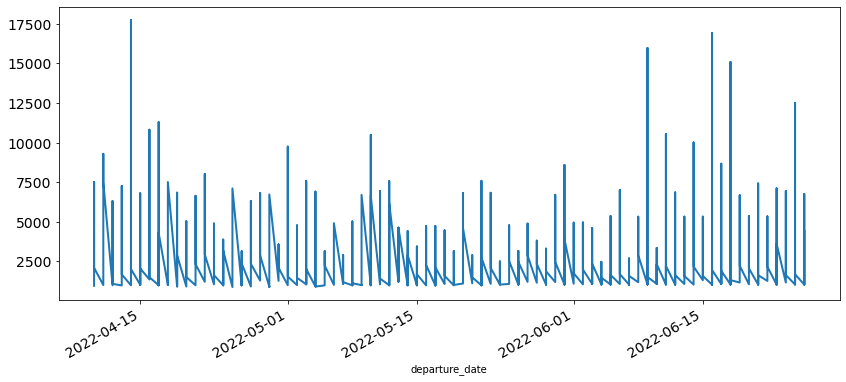

In [13]:
time_df.plot(figsize=(14,6), linewidth=2, fontsize=14);

In [14]:
# importing relevant library
from statsmodels.tsa.stattools import adfuller

# For testing stationarity
def dicky_fuller_test(data):
    alpha = 0.05
    is_stationary = adfuller(data)[1] < alpha
    if is_stationary == True:
        print(f'The data is stationary with a fuller score of {round(adfuller(data)[1],3)}')
    else:
        print(f'The data is not stationary with a fuller score of {round(adfuller(data)[1],3)}')
    return

In [15]:
dicky_fuller_test(time_df)

The data is stationary with a fuller score of 0.0
